<a href="https://colab.research.google.com/github/coolksrini/edureka_python_course/blob/main/python_certificate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
pd.options.mode.copy_on_write = True

dataset_path = '/content/drive/MyDrive/Courses/Edureka_GenAI_Certificate/Edureka_Python_Programming/Datasets/'

In [3]:
bookings_df = pd.read_csv(f"{dataset_path}/Bookings.csv")
bookings_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [4]:
sessions_df = pd.read_csv(f"{dataset_path}/Sessions.csv")
sessions_df

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [5]:
# prompt: Using dataframe sessions_df: with oBSR defined as the ratio of number of bookings by number of searches for a given interval, get the average oBSR for each month of the year



# 1. Find the number of distinct bookings, sessions, and searches from the dataset

In [6]:
# Get the number of unique booking_id values
num_unique_booking_ids = bookings_df['booking_id'].nunique()
print(f"Number of unique booking_id values: {num_unique_booking_ids}")

Number of unique booking_id values: 339


In [7]:
# Get the number of unique session_id values
unique_session_ids = sessions_df['session_id'].nunique()

# Print the number of unique session_id values
print(f"Number of unique session_id values: {unique_session_ids}")

Number of unique session_id values: 331


In [8]:
# Get the number of unique session_id values
unique_search_ids = sessions_df['search_id'].nunique()

# Print the number of unique session_id values
print(f"Number of unique search_id values: {unique_search_ids}")

Number of unique search_id values: 1360


# 2. How many sessions have more than one booking

In [9]:
# Filter bookings_df to include only rows where booking_id is not NaN
valid_sesisons_df = sessions_df.dropna(subset=['booking_id'])

# Count the occurrences of each session_id that has a valid booking_id
session_bookings = valid_sesisons_df.groupby('session_id')['booking_id'].count()

# Filter for session_ids with more than one valid booking_id
sessions_with_multiple_bookings = session_bookings[session_bookings > 1]

# Print the number of such sessions
print(f"Number of sessions with more than one booking: {len(sessions_with_multiple_bookings)}")

Number of sessions with more than one booking: 35


# 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week

In [10]:
# Convert the booking_time column to datetime objects
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
# Extract the weekday from the booking_time
bookings_df['weekday'] = bookings_df['booking_time'].dt.day_name()
# Group by weekday and count the number of bookings
bookings_by_weekday = bookings_df.groupby('weekday').size().reset_index(name='number_of_bookings')
# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert the 'weekday' column to a categorical type with the specified order
bookings_by_weekday['weekday'] = pd.Categorical(bookings_by_weekday['weekday'], categories=weekday_order, ordered=True)
# Sort by the ordered weekday column
bookings_by_weekday = bookings_by_weekday.sort_values('weekday')
# Display the result
bookings_by_weekday

,weekday,number_of_bookings
1,Monday,51
5,Tuesday,59
6,Wednesday,34
4,Thursday,65
0,Friday,51
2,Saturday,44
3,Sunday,35


In [11]:
import altair as alt

# Find the weekday with the maximum number of bookings
max_bookings_weekday = bookings_by_weekday.loc[bookings_by_weekday['number_of_bookings'].idxmax()]

# Create a pie chart
chart = alt.Chart(bookings_by_weekday).mark_arc().encode(
    theta=alt.Theta(field="number_of_bookings", type="quantitative"),
    color=alt.Color(field="weekday", type="nominal")
)

# Display the chart and the weekday with maximum bookings
print("Weekday with maximum bookings:")
print(max_bookings_weekday)
chart

Weekday with maximum bookings:
weekday               Thursday
number_of_bookings          65
Name: 4, dtype: object


alt.Chart(...)

# 4. For each of the service names,display the total number of bookings and the total Gross Booking Value in INR

In [12]:
# Group by 'service_name' and aggregate the count of bookings and sum of 'INR_Amount'
service_summary = bookings_df.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_GBV_INR=('INR_Amount', 'sum')
)

# Display the resulting summary
service_summary

,total_bookings,total_GBV_INR
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


# 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [13]:
# Count the number of bookings per customer
customer_booking_counts = bookings_df.groupby('customer_id').size()

# Get the customer IDs who have more than 1 booking
customers_with_multiple_bookings = customer_booking_counts[customer_booking_counts > 1].index

# Filter the original dataframe to include only bookings from these customers
filtered_bookings = bookings_df[bookings_df['customer_id'].isin(customers_with_multiple_bookings)]

# Create a new column representing the route
filtered_bookings['route'] = filtered_bookings['from_city'] + ' to ' + filtered_bookings['to_city']

# Count the occurrences of each route and get the most frequent one
most_booked_route = filtered_bookings['route'].value_counts().index[0]

# Print the most booked route
print(f"Most booked route is : {most_booked_route}")

Most booked route is : Gurgaon to Roissy-en-France


# 6. Which are the top 3 departure cities from where customers book mostly in advance,provided that there have been at least 5 departures from that city?

In [14]:
df = bookings_df.copy()
df["is_booked_in_advance"] = df['days_to_departure'].apply(lambda x: 1 if x > 0 else 0)
# Group by from_city and calculate the average days to departure and the count of bookings
city_departure_stats = df.groupby('from_city').agg(
    avg_is_booked_in_advance=('is_booked_in_advance', 'mean'),
    booking_count=('booking_id', 'count')
).reset_index()

# Filter cities with at least 5 departures
filtered_cities = city_departure_stats[((city_departure_stats['booking_count'] >= 5) & (city_departure_stats['avg_is_booked_in_advance'] > 0.5))]

# Sort by average days to departure in descending order and get the top 3
top_cities = filtered_cities.sort_values(by='booking_count', ascending=False).head(3)

# Display the top 3 cities
top_cities

,from_city,avg_is_booked_in_advance,booking_count
16,Gurgaon,0.963235,136
27,Mumbai,1.000000,34
10,Delhi,1.000000,29


# 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset, have the maximum correlation?

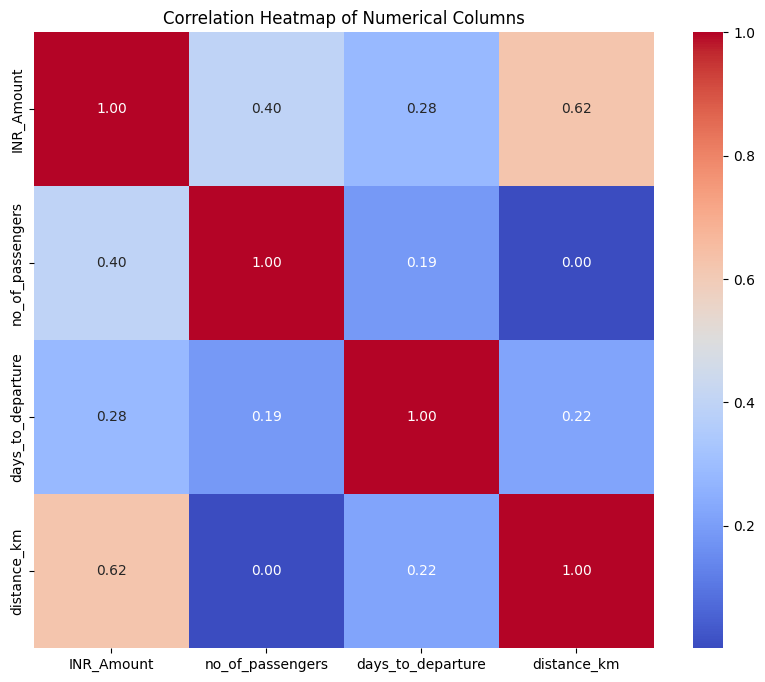

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'distance_km') with a correlation of 0.62


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get only numerical columns
fitlered_df = bookings_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
correlation_matrix = fitlered_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Find the maximum absolute correlation value excluding the diagonal
filtered_correlations = correlation_matrix.abs().stack().drop_duplicates()
max_correlation = filtered_correlations[filtered_correlations != 1.0].max()

# Find the pair of columns with the maximum correlation
max_corr_pair = filtered_correlations[filtered_correlations == max_correlation].idxmax()

print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair} with a correlation of {max_correlation:.2f}")

# 8. For each service, which is the most used device type for making bookings on the platform?

In [16]:
# Group by service name and device type, then count occurrences
device_counts = bookings_df.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')

# Find the device type with the maximum count for each service
most_used_device = device_counts.loc[device_counts.groupby('service_name')['count'].idxmax()]

# Display the result
most_used_device

,service_name,device_type_used,count
2,GOIBIBO,IOS,70
5,MMT,Desktop,30
9,YATRA,Desktop,51


#9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

In [17]:
import pandas as pd
import altair as alt

# Resample the data to a quarterly frequency and count the number of bookings per device type
quarterly_bookings = bookings_df.groupby(['device_type_used', pd.Grouper(key='booking_time', freq='Q')])['booking_id'].count().reset_index()
quarterly_bookings.rename(columns={'booking_id': 'number_of_bookings'}, inplace=True)

# Create the time series chart
chart = alt.Chart(quarterly_bookings).mark_line().encode(
    # Map the booking time to the x-axis with a quarter time unit
    x=alt.X('booking_time', axis=alt.Axis(title='Time', format='%Y-%m-%d'), title='Quarter'),
    # Map the number of bookings to the y-axis
    y=alt.Y('number_of_bookings', title='Number of Bookings'),
    # Color the lines based on the device type
    color='device_type_used'
).properties(
    # Set the title of the chart
    title='Quarterly Booking Trends by Device Type'
).interactive() # Enable interactivity (zooming and panning)

chart

/tmp/ipython-input-17-1690189408.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_bookings = bookings_df.groupby(['device_type_used', pd.Grouper(key='booking_time', freq='Q')])['booking_id'].count().reset_index()


alt.Chart(...)

# 10. Consider the following example:12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.searches=100 bookings=10 customers=12The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

##  a. What is the average oBSR for each month of the year?
##  b. What is the average oBSR for each day of the week?
##  c. Plot a time series of oBSR on all the given dates.

In [18]:
import pandas as pd

# Convert 'search_time' to datetime objects
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')

# Extract the month from the search_time
sessions_df['month'] = sessions_df['search_time'].dt.month

# Group by month and count the number of searches and bookings
monthly_data = sessions_df.groupby('month').agg(
    num_searches=('search_id', 'count'),
    num_bookings=('booking_id', lambda x: x.notna().sum()) # Count non-null booking_ids
).reset_index()

# Calculate oBSR
monthly_data['oBSR'] = monthly_data['num_bookings'] / monthly_data['num_searches']

# Display the average oBSR for each month
monthly_data[['month', 'oBSR']]

,month,oBSR
0,1,0.260664
1,2,0.293785
2,3,0.257143
3,4,0.275000
4,5,0.181818
5,6,0.393939
6,7,0.162500
7,8,0.300000
8,9,0.384615
9,10,0.170347


In [19]:
import pandas as pd

# Convert 'search_time' to datetime objects
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')

# Extract the month from the search_time
sessions_df['day'] = sessions_df['search_time'].dt.day_name()

# Group by month and count the number of searches and bookings
day_data = sessions_df.groupby('day').agg(
    num_searches=('search_id', 'count'),
    num_bookings=('booking_id', lambda x: x.notna().sum()) # Count non-null booking_ids
).reset_index()

# Calculate oBSR
day_data['oBSR'] = day_data['num_bookings'] / day_data['num_searches']

# Display the average oBSR for each month
day_data[['day', 'oBSR']]

,day,oBSR
0,Friday,0.280788
1,Monday,0.212598
2,Saturday,0.245000
3,Sunday,0.336283
4,Thursday,0.239726
5,Tuesday,0.284404
6,Wednesday,0.165899


In [20]:
import pandas as pd

# Convert 'search_time' to datetime objects
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')

# Extract the month from the search_time
sessions_df['search_date'] = sessions_df['search_time'].dt.date

# Group by month and count the number of searches and bookings
daily_data = sessions_df.groupby('search_date').agg(
    num_searches=('search_id', 'count'),
    num_bookings=('booking_id', lambda x: x.notna().sum()) # Count non-null booking_ids
).reset_index()

# Calculate oBSR
daily_data['oBSR'] = daily_data['num_bookings'] / daily_data['num_searches']

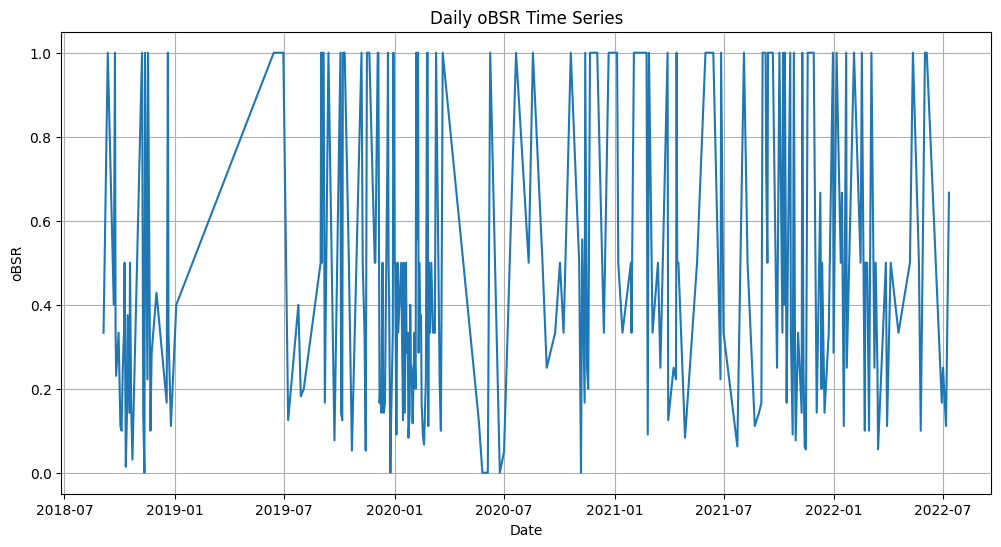

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Ensure 'search_date' is in datetime format for plotting
daily_data['search_date'] = pd.to_datetime(daily_data['search_date'])

# Plot the time series of oBSR
plt.figure(figsize=(12, 6))
plt.plot(daily_data['search_date'], daily_data['oBSR'])
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.title('Daily oBSR Time Series')
plt.grid(True)
plt.show()